# TCIPC analysis with different amount of harmonics

## Loading data

In [1]:
import socket

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import griddata
from weis.visualization.utils import load_OMsql_multi, load_OMsql
from cmcrameri import cm

socket.gethostname()  # Should not be a login node.

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.DeprecationWarning: /home/jesse/miniconda3/envs/tip_clearance/lib/python3.13/site-packages/pkg_resources/__init__.py:3146
Deprecated call to `pkg_resources.declare_namespace('sphinxcontrib')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packagesDeprecationWarning: /home/jesse/miniconda3/envs/tip_clearance/lib/python3.13/site-packages/jsonmerge/__init__.py:27
Accessing Draft4Validator.resolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization.DeprecationWarni

'J1YCSV3'

In [2]:
# Define the logs to load and compare
logs_to_load = {
    "Laminar": "../../data/design_of_experiments/ps_vs_ipc_harmonics/log_ps_vs_ipc_harmonics.sql*",
    "DLC 1.1": "../../data/design_of_experiments/ps_vs_ipc_harmonics_turbulence/log_ps_vs_ipc_harmonics_turbulence.sql*",
    # "DLC 1.5": "../../data/design_of_experiments/ps_vs_ipc_harmonics_DLC1p5/log_ps_vs_ipc_harmonics_DLC1p5.sql*",
}

# Load all datasets
all_data_dicts = {}
for log_name, log_fmt in logs_to_load.items():
    all_data_dicts[log_name] = load_OMsql_multi(log_fmt)
    print(f"Loaded {log_name}: {all_data_dicts[log_name].keys()}")

This process (pid=2733) is multi-threaded, use of fork() may lead to deadlocks in the child.

Loaded Laminar: dict_keys(['aeroelastic.platform_displacement', 'aeroelastic.hub_system_cm', 'aeroelastic.platform_elem_rho', 'aeroelastic.platform_elem_E', 'aeroelastic.platform_elem_G', 'aeroelastic.platform_total_center_of_mass', 'aeroelastic.platform_mass', 'aeroelastic.platform_I_total', 'aeroelastic.beta_wave', 'aeroelastic.gamma_f', 'aeroelastic.gamma_m', 'aeroelastic.E', 'aeroelastic.twr2shaft', 'aeroelastic.Xt', 'aeroelastic.Xc', 'aeroelastic.m', 'aeroelastic.definition_layer', 'aeroelastic.sc_ss_mats', 'aeroelastic.sc_ps_mats', 'aeroelastic.te_ss_mats', 'aeroelastic.te_ps_mats', 'aeroelastic.monopile_wohlerexp', 'aeroelastic.monopile_wohlerA', 'aeroelastic.monopile_ultstress', 'aeroelastic.pitch_axis', 'aeroelastic.monopile_axial_load2stress', 'aeroelastic.monopile_shear_load2stress', 'aeroelastic.transition_node', 'aeroelastic.platform_nodes', 'aeroelastic.platform_elem_n1', 'aeroelastic.platform_elem_n2', 'aeroelastic.platform_elem_D', 'aeroelastic.platform_elem_t', 'aeroel

This process (pid=2733) is multi-threaded, use of fork() may lead to deadlocks in the child.

Loaded DLC 1.1: dict_keys(['aeroelastic.platform_displacement', 'aeroelastic.hub_system_cm', 'aeroelastic.platform_elem_rho', 'aeroelastic.platform_elem_E', 'aeroelastic.platform_elem_G', 'aeroelastic.platform_total_center_of_mass', 'aeroelastic.platform_mass', 'aeroelastic.platform_I_total', 'aeroelastic.beta_wave', 'aeroelastic.gamma_f', 'aeroelastic.gamma_m', 'aeroelastic.E', 'aeroelastic.twr2shaft', 'aeroelastic.Xt', 'aeroelastic.Xc', 'aeroelastic.m', 'aeroelastic.definition_layer', 'aeroelastic.sc_ss_mats', 'aeroelastic.sc_ps_mats', 'aeroelastic.te_ss_mats', 'aeroelastic.te_ps_mats', 'aeroelastic.monopile_wohlerexp', 'aeroelastic.monopile_wohlerA', 'aeroelastic.monopile_ultstress', 'aeroelastic.pitch_axis', 'aeroelastic.monopile_axial_load2stress', 'aeroelastic.monopile_shear_load2stress', 'aeroelastic.transition_node', 'aeroelastic.platform_nodes', 'aeroelastic.platform_elem_n1', 'aeroelastic.platform_elem_n2', 'aeroelastic.platform_elem_D', 'aeroelastic.platform_elem_t', 'aeroel

In [50]:
# Plot settings.
text_width_in = 455.24408 / 64
default_fig_width = 0.9 * text_width_in
default_aspect_ratio = 1 / (0.5 * (1 + np.sqrt(5)))

plt.rcParams.update(
    {
        "font.family": "serif",
        "font.serif": ["Latin Modern Roman"],
        "font.size": 10,
        "text.usetex": False,
        "pdf.fonttype": 42,  # TrueType fonts for better PDF embedding
        "ps.fonttype": 42,
        "figure.figsize": [default_fig_width, default_fig_width * default_aspect_ratio],
        "image.cmap": "cmc.batlow",
    }
)

In [51]:
import matplotlib.font_manager as fm

print(sorted(fm.get_font_names()))

['DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif Display', 'Inconsolata', 'Latin Modern Mono', 'Latin Modern Mono Caps', 'Latin Modern Mono Light', 'Latin Modern Mono Light Cond', 'Latin Modern Mono Prop', 'Latin Modern Mono Prop Light', 'Latin Modern Mono Slanted', 'Latin Modern Roman', 'Latin Modern Roman Caps', 'Latin Modern Roman Demi', 'Latin Modern Roman Dunhill', 'Latin Modern Roman Slanted', 'Latin Modern Roman Unslanted', 'Latin Modern Sans', 'Latin Modern Sans Demi Cond', 'Latin Modern Sans Quotation', 'STIXGeneral', 'STIXNonUnicode', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'Source Code Pro', 'Ubuntu', 'Ubuntu Condensed', 'Ubuntu Mono', 'Ubuntu Sans', 'Ubuntu Sans Mono', 'cmb10', 'cmex10', 'cmmi10', 'cmr10', 'cmss10', 'cmsy10', 'cmtt10']


In [52]:
# Let's define how we load, scale, and label the data, then make a dataframe.
all_outputs = {
    "rank": {
        "key": "rank",
        "scaling": lambda x: x,
        "label": "rank",
    },
    "iter": {
        "key": "iter",
        "scaling": lambda x: x,
        "label": "iter",
    },
    # ROSCO variables.
    "TCIPC_MaxTipDeflection": {
        "key": "tune_rosco_ivc.TCIPC_MaxTipDeflection",
        "scaling": lambda x: x,
        "label": "TCIPC Max Tip Deflection (m)",
    },
    "ps_percent": {
        "key": "tune_rosco_ivc.ps_percent",
        "scaling": lambda x: x,
        "label": "Peak Shaving (%)",
    },
    "TCIPC_nHarmonics": {
        "key": "tune_rosco_ivc.TCIPC_nHarmonics",
        "scaling": lambda x: x,
        "label": "Number of harmonics",
    },
    "TCIPC_ZeroYawDeflection": {
        "key": "tune_rosco_ivc.TCIPC_ZeroYawDeflection",
        "scaling": lambda x: x,
        "label": "Zero yaw deflection",
    },
    # Objectives / responses
    "aep": {
        "key": "aeroelastic.AEP",
        "scaling": lambda x: 1e-6 * x,  # kWh -> GWh
        "label": "AEP (GWh)",
    },
    "max_TipDxc_towerPassing": {
        "key": "aeroelastic.max_TipDxc_towerPassing",
        "scaling": lambda x: x,
        "label": "Max TipDxc Tower Passing (m)",
    },
    "mean_TipDxc_towerPassing": {
        "key": "aeroelastic.mean_TipDxc_towerPassing",
        "scaling": lambda x: x,
        "label": "Max TipDxc Tower Passing (m)",
    },
    "mean_TipDxc_towerPassing_error": {
        "key": "aeroelastic.mean_TipDxc_towerPassing",
        "scaling": lambda x: np.abs(10 - x),  # Hard-coded.
        "label": "Max TipDxc Tower Passing (m)",
    },
    "tower_clearance": {
        "key": "aeroelastic.max_TipDxc_towerPassing",
        "scaling": lambda x: 30 - x,
        "label": "Tower clearance (m)",
    },
    "avg_pitch_travel": {
        "key": "aeroelastic.avg_pitch_travel",
        "scaling": lambda x: x,
        "label": "Avg Pitch Travel (deg)",
    },
    "DEL_RootMyb": {
        "key": "aeroelastic.DEL_RootMyb",
        "scaling": lambda x: x,  # Assuming kNm already
        "label": "DEL Root Myb (kNm)",
    },
    "max_TwrBsMyt": {
        "key": "aeroelastic.max_TwrBsMyt",
        "scaling": lambda x: x,  # Assuming kNm already
        "label": "Max Tower Base Myt (kNm)",
    },
}

# Build dataframe from mapping for each log
labels = {short: info["label"] for short, info in all_outputs.items()}
all_dfs = []

for log_name, data_dict in all_data_dicts.items():
    df_dict = {}
    for short_label, info in all_outputs.items():
        data = data_dict[info["key"]]
        scaled_data = list(map(info["scaling"], data))
        df_dict[short_label] = scaled_data

    df_temp = pd.DataFrame(df_dict)
    df_temp["log_name"] = log_name  # Add identifier column
    all_dfs.append(df_temp)

# Combine all dataframes
df = pd.concat(all_dfs, ignore_index=True)
print(f"Combined dataframe shape: {df.shape}")
df.head()

Combined dataframe shape: (20, 15)


,rank,iter,TCIPC_MaxTipDeflection,ps_percent,TCIPC_nHarmonics,TCIPC_ZeroYawDeflection,aep,max_TipDxc_towerPassing,mean_TipDxc_towerPassing,mean_TipDxc_towerPassing_error,tower_clearance,avg_pitch_travel,DEL_RootMyb,max_TwrBsMyt,log_name
0,0,0,10.0,0.8,1.0,0.0,131.399878,9.919761,9.875645,0.124355,20.080239,1.728829,26118.251823,88063.296875,Laminar
1,0,1,10.0,0.8,6.0,0.0,131.399880,10.053298,10.007558,0.007558,19.946702,1.770233,26839.211593,87561.117188,Laminar
2,1,0,10.0,0.8,2.0,0.0,131.399878,10.050877,10.007963,0.007963,19.949123,1.770436,26861.982297,87564.531250,Laminar
3,1,1,10.0,0.8,7.0,0.0,131.399880,10.044335,9.998143,0.001857,19.955665,1.767944,26792.185318,87576.921875,Laminar
4,2,0,10.0,0.8,3.0,0.0,131.399877,10.072972,10.028922,0.028922,19.927028,1.774929,26947.054835,87518.421875,Laminar


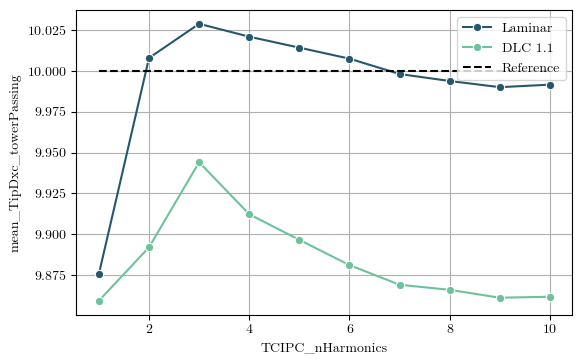

In [53]:
sns.lineplot(
    df, x="TCIPC_nHarmonics", y="mean_TipDxc_towerPassing", hue="log_name", marker="o"
)
plt.hlines([10], 1, 10, "k", "--", label="Reference")
plt.grid()
plt.legend()

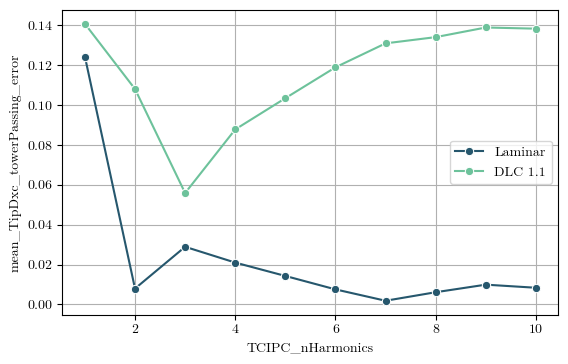

In [54]:
sns.lineplot(
    df,
    x="TCIPC_nHarmonics",
    y="mean_TipDxc_towerPassing_error",
    hue="log_name",
    marker="o",
)
# plt.hlines([10], 1, 10, "k", "--")
# plt.ylim([0, 0.15])
plt.grid()
plt.legend()

In [55]:
import pickle
import glob
import os
import re

# Build timeseries globs for each log
timeseries_globs = {}
for log_name, log_fmt in logs_to_load.items():
    timeseries_globs[log_name] = os.path.join(
        os.path.dirname(log_fmt),
        "openfast_runs/rank_*/iteration_*/timeseries/weis_job*.p",
    )

In [56]:
# Collect distribution data for each nHarmonics and log
plot_data = []
for log_name, timeseries_glob in timeseries_globs.items():
    for filepath in sorted(glob.glob(timeseries_glob)):
        # Extract rank and iteration from filepath
        match = re.search(r"/rank_(\d+)/iteration_(\d+)/", filepath)
        rank = int(match.group(1))
        iter_num = int(match.group(2))

        # Get TCIPC_nHarmonics from dataframe
        df_subset = df[
            (df["rank"] == rank)
            & (df["iter"] == iter_num)
            & (df["log_name"] == log_name)
        ]
        if len(df_subset) == 0:
            continue
        nharmonics_value = int(df_subset["TCIPC_nHarmonics"].values[0])

        with open(filepath, "rb") as f:
            ts = pickle.load(f)
            mask = (ts.Azimuth > 175) & (ts.Azimuth < 185)

            for value in ts.TipDxc1[mask]:
                plot_data.append(
                    {
                        "nHarmonics": nharmonics_value,
                        "TipDxc1": value,
                        "log_name": log_name,
                    }
                )

df_plot = pd.DataFrame(plot_data)

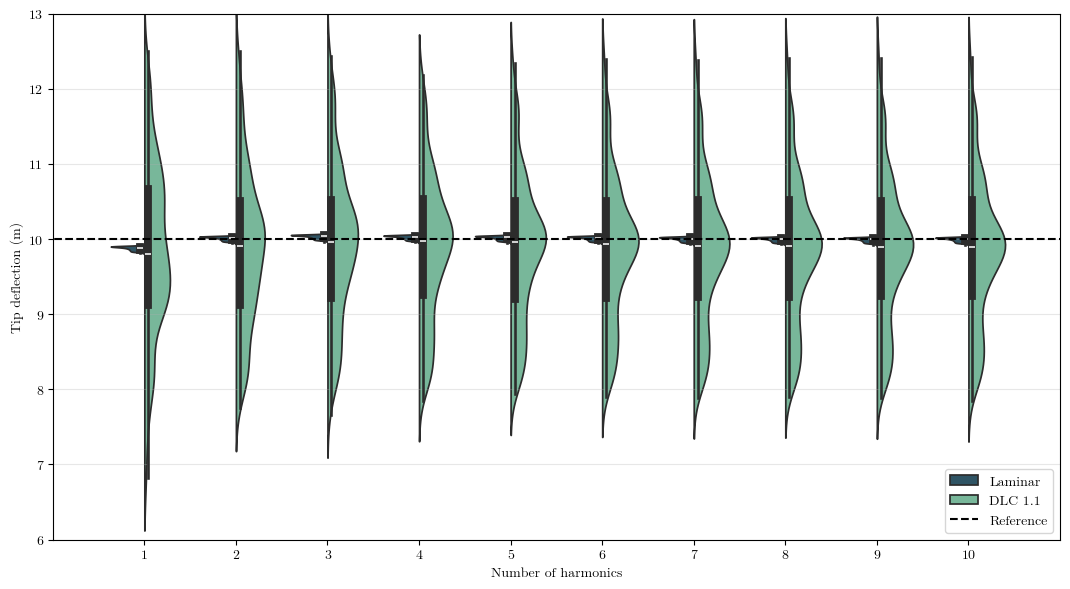

In [57]:
# Create violin plot with hue for different logs
# Distribution plot of TipDxc1 for each nHarmonics value using violin plots
# The scale for turbulence and no turbulence is just very different so this is difficult
# to compare.
fig, ax = plt.subplots(figsize=(5.4 * 2, 3 * 2))
sns.violinplot(
    data=df_plot, x="nHarmonics", y="TipDxc1", hue="log_name", ax=ax, split=True
)

plt.hlines([10], -10, 10, "k", "--", label="Reference", zorder=10)
plt.legend()

ax.set_xlim(-1, 10)

ax.set_xlabel("Number of harmonics")
ax.set_ylabel("Tip deflection (m)")
ax.grid(alpha=0.3, axis="y")
# ax.set_ylim(9.75, 10.1)
ax.set_ylim(6, 13)
plt.tight_layout()

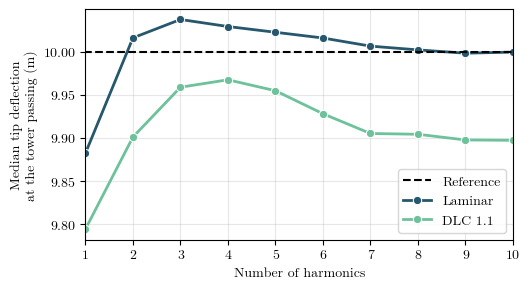

In [58]:
# Plot median tip deflection for each nHarmonics value
fig, ax = plt.subplots(figsize=(5.4, 3))

# Calculate medians for each log separately
median_data = []
for log_name in df_plot["log_name"].unique():
    df_log = df_plot[df_plot["log_name"] == log_name]
    for nharmonics in sorted(df_log["nHarmonics"].unique()):
        values = df_log[df_log["nHarmonics"] == nharmonics]["TipDxc1"]
        median_value = np.median(values)
        median_data.append(
            {"nHarmonics": nharmonics, "median": median_value, "log_name": log_name}
        )

df_medians = pd.DataFrame(median_data)

nharmonics_range = df_medians["nHarmonics"].unique()
plt.hlines(
    [10],
    min(nharmonics_range) - 0.5,
    max(nharmonics_range) + 0.5,
    "k",
    "--",
    label="Reference",
    zorder=10,
)

# Plot median lines with hue
sns.lineplot(
    data=df_medians,
    x="nHarmonics",
    y="median",
    hue="log_name",
    marker="o",
    linewidth=2,
    markersize=6,
    ax=ax,
    # cmap=cm.batlow,
)

# Add reference line
plt.legend()

ax.set_xlabel("Number of harmonics")
ax.set_ylabel("Median tip deflection\nat the tower passing (m)")
ax.grid(alpha=0.3)
ax.set_xlim(1, 10)
# ax.set_ylim(6, 13)
plt.tight_layout()

plt.savefig("figures/nHarmonics.pdf")